In [1]:
import glob
import os
import re
from Chemometrics.import_common import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
files = glob.glob(os.getcwd()+'\\\**\*.txt', recursive=True)

In [2]:
df = []
for f_ in files:
    with open(f_) as f:
        df.append(pd.read_table(f,header=None,index_col=0))

In [3]:
df = pd.concat(df,axis=1)
df.index.name='波长(nm)'

In [4]:
labels = [re.search('(?<=区分\\\).*(?=\\\[^\\\]*\.txt)',f)[0] for f in files]

In [5]:
df.columns = labels

In [6]:
PET = df.loc[:,df.columns.map(lambda x:x.startswith('PET')).values]
fibers = df.iloc[:,2:]

In [7]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'

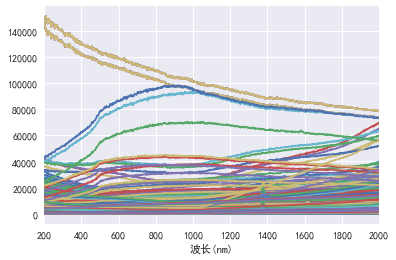

In [8]:
fibers.plot(legend=False)

In [9]:
colors = [re.search('.*(?=-拉曼数据)',x)[0] for x in fibers.columns]

In [10]:
company = [re.search('(?<=#)[^0-9]*',x)[0] for x in fibers.columns]

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

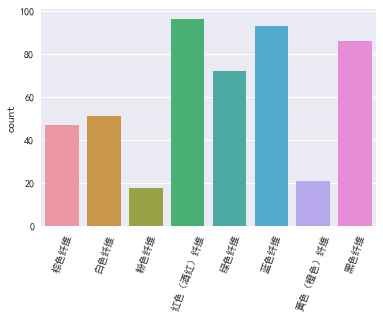

In [11]:
sns.countplot(colors)
plt.xticks(rotation=70)

In [12]:
#save data数据入库
data = {'拉曼光谱':df,'PET':PET,'厂家纤维':fibers,'colors':colors,'companys':company}
psave(data,'公安大学纤维颜色.p')

In [13]:
y = colors
X = fibers.T
X_train,X_test,y_train,y_test= train_test_split(X,y,)

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_new = PCA().fit_transform(X_std)

In [35]:
_X_std = pd.DataFrame(X_std,index=X.index,columns=X.columns)

In [16]:
from sklearn.preprocessing import LabelEncoder
y_num = LabelEncoder().fit_transform(y)

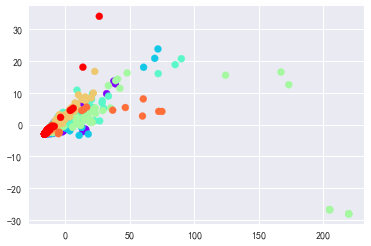

In [36]:
plt.scatter(X_new[:,0],X_new[:,1],c=y_num,cmap=plt.cm.rainbow)

In [18]:
from sklearn.preprocessing import StandardScaler

In [20]:
# plt.bar(range(len(pca.explained_variance_ratio_[:10])), pca.explained_variance_ratio_[:10])

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
company

['三洲线带',
 '三洲线带',
 '三洲线带',
 '三洲线带',
 '三洲线带',
 '纺院 AB',
 '纺院 AB',
 '纺院 AB',
 '纺院 AB',
 '纺院 AB',
 '纺院 AB',
 '三洲线带',
 '三洲线带',
 '三洲线带',
 '三洲线带',
 '三洲线带',
 '三洲线带',
 '金凤',
 '金凤',
 '金凤',
 '三洲线带',
 '三洲线带',
 '三洲线带',
 '勇信',
 '勇信',
 '勇信',
 '林色行',
 '林色行',
 '林色行',
 '一万布业',
 '一万布业',
 '一万布业',
 '一万布业',
 '一万布业',
 '一万布业',
 '东元',
 '东元',
 '东元',
 '东元',
 '东元',
 '东元',
 '鹤盛',
 '鹤盛',
 '鹤盛',
 '金生源',
 '金生源',
 '金生源',
 '纺院 AA',
 '纺院 AA',
 '纺院 AA',
 '纺院 AB',
 '纺院 AB',
 '纺院 AB',
 '纺院 KA',
 '纺院 KA',
 '纺院 KA',
 '纺院 AA',
 '纺院 AA',
 '纺院 AA',
 '纺院 AA',
 '纺院 AA',
 '纺院 AA',
 '金凤',
 '金凤',
 '金凤',
 '金宋',
 '金宋',
 '金宋',
 '勇信',
 '勇信',
 '勇信',
 '东元',
 '东元',
 '东元',
 '一万布业',
 '一万布业',
 '一万布业',
 '勇信',
 '勇信',
 '勇信',
 '鸿睿织道',
 '鸿睿织道',
 '鸿睿织道',
 '鹤盛',
 '鹤盛',
 '鹤盛',
 '鹤盛',
 '鹤盛',
 '鹤盛',
 '金生源',
 '金生源',
 '金生源',
 '新冬日',
 '新冬日',
 '新冬日',
 '鹤盛',
 '鹤盛',
 '鹤盛',
 '纺院 AA',
 '纺院 AA',
 '纺院 AA',
 '纺院 AB',
 '纺院 AB',
 '纺院 AB',
 '纺院 AA',
 '纺院 AA',
 '纺院 AA',
 '金凤',
 '金凤',
 '金凤',
 '三洲线带',
 '三洲线带',
 '三洲线带',
 '林色行',
 '林色行',
 '林色行',
 '纺院 AA',
 '纺院 AA',
 '纺院 

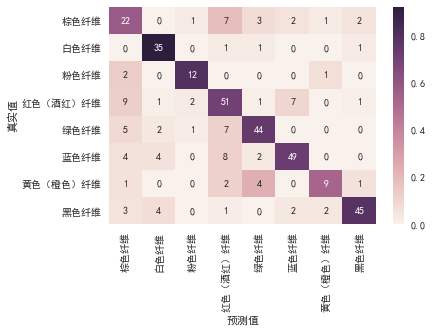

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
preds_train_knn = knn.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,preds_train_knn)
plot_ConfusionMatrix(cm,knn.classes_)

In [23]:
knn.score(X_train,y_train)

0.7355371900826446

In [24]:
cross_val_score(knn,X_train,y_train)

array([0.56910569, 0.52459016, 0.52542373])

random forests

In [25]:
rf = RandomForestClassifier(class_weight='balanced',random_state=1,n_jobs=-1)

In [26]:
param_grid = {'min_samples_leaf':range(3,20),'max_depth':range(1,6),'max_features':range(20,200,10)}

In [27]:
grid = GridSearchCV(rf,param_grid).fit(X_train,y_train)
preds_train_rf = grid.predict(X_train)

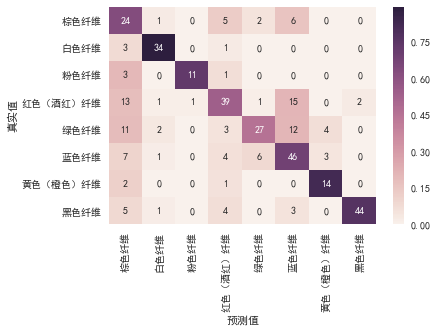

In [29]:
from sklearn.metrics import confusion_matrix
preds_train_rf = grid.predict(X_train)
cm = confusion_matrix(y_train,preds_train_rf)
plot_ConfusionMatrix(cm,knn.classes_)